<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [70]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Importación de las clases creadas en nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_encoding as se


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')



In [71]:
df = pd.read_csv("datos/outliers_num.csv", index_col=0)
df.head()

,postalCode,price,powerCV_robust,kilometer_robust,outliers_lof_5_0.01,outliers_lof_5_0.05,outliers_lof_5_0.1,outliers_lof_20_0.01,outliers_lof_20_0.05,outliers_lof_20_0.1,outliers_lof_50_0.01,outliers_lof_50_0.05,outliers_lof_50_0.1,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage
0,70435,480.0,-0.374913,0.0,1,1,1,1,1,1,1,1,1,private,offer,test,desconocido,Clásico,manually,3.0,petrol,volkswagen,desconocido
1,66954,18300.0,1.128683,-1.0,1,1,1,1,1,1,1,1,1,private,offer,test,coupe,Moderno,manually,5.0,diesel,audi,yes
2,90480,9800.0,0.746735,-1.0,1,1,1,1,1,1,1,1,1,private,offer,test,suv,Moderno,automatic,8.0,diesel,jeep,desconocido
3,91074,1500.0,-0.531319,0.0,1,1,1,1,1,1,1,1,1,private,offer,test,small car,Moderno,manually,6.0,petrol,volkswagen,no
4,60437,3600.0,-0.619461,-2.4,1,1,1,1,1,1,1,1,1,private,offer,test,small car,Moderno,manually,7.0,diesel,skoda,no


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371528 entries, 0 to 371527
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   postalCode            371528 non-null  int64  
 1   price                 371528 non-null  float64
 2   powerCV_robust        371528 non-null  float64
 3   kilometer_robust      371528 non-null  float64
 4   outliers_lof_5_0.01   371528 non-null  int64  
 5   outliers_lof_5_0.05   371528 non-null  int64  
 6   outliers_lof_5_0.1    371528 non-null  int64  
 7   outliers_lof_20_0.01  371528 non-null  int64  
 8   outliers_lof_20_0.05  371528 non-null  int64  
 9   outliers_lof_20_0.1   371528 non-null  int64  
 10  outliers_lof_50_0.01  371528 non-null  int64  
 11  outliers_lof_50_0.05  371528 non-null  int64  
 12  outliers_lof_50_0.1   371528 non-null  int64  
 13  seller                371528 non-null  object 
 14  offerType             371528 non-null  object 
 15  abtes

In [73]:
df[['monthOfRegistration']] = df[['monthOfRegistration']].astype(str)


In [74]:
# primero vamos a sacar los nombres de las columnas que son de tipo categórico
lista_col_categ = df.select_dtypes(include = "O").columns.tolist()
lista_col_categ

['seller',
 'offerType',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage']

Vamos a hacer un analisis visual de las columnas catgóricas. Empezamos con un boxplot

In [75]:
# Instanciamos la clase de Encoding
analisis_encoding = se.Analisis_Visual_Encoding(variable_respuesta="price", dataframe=df, lista_variables_categorias=lista_col_categ)



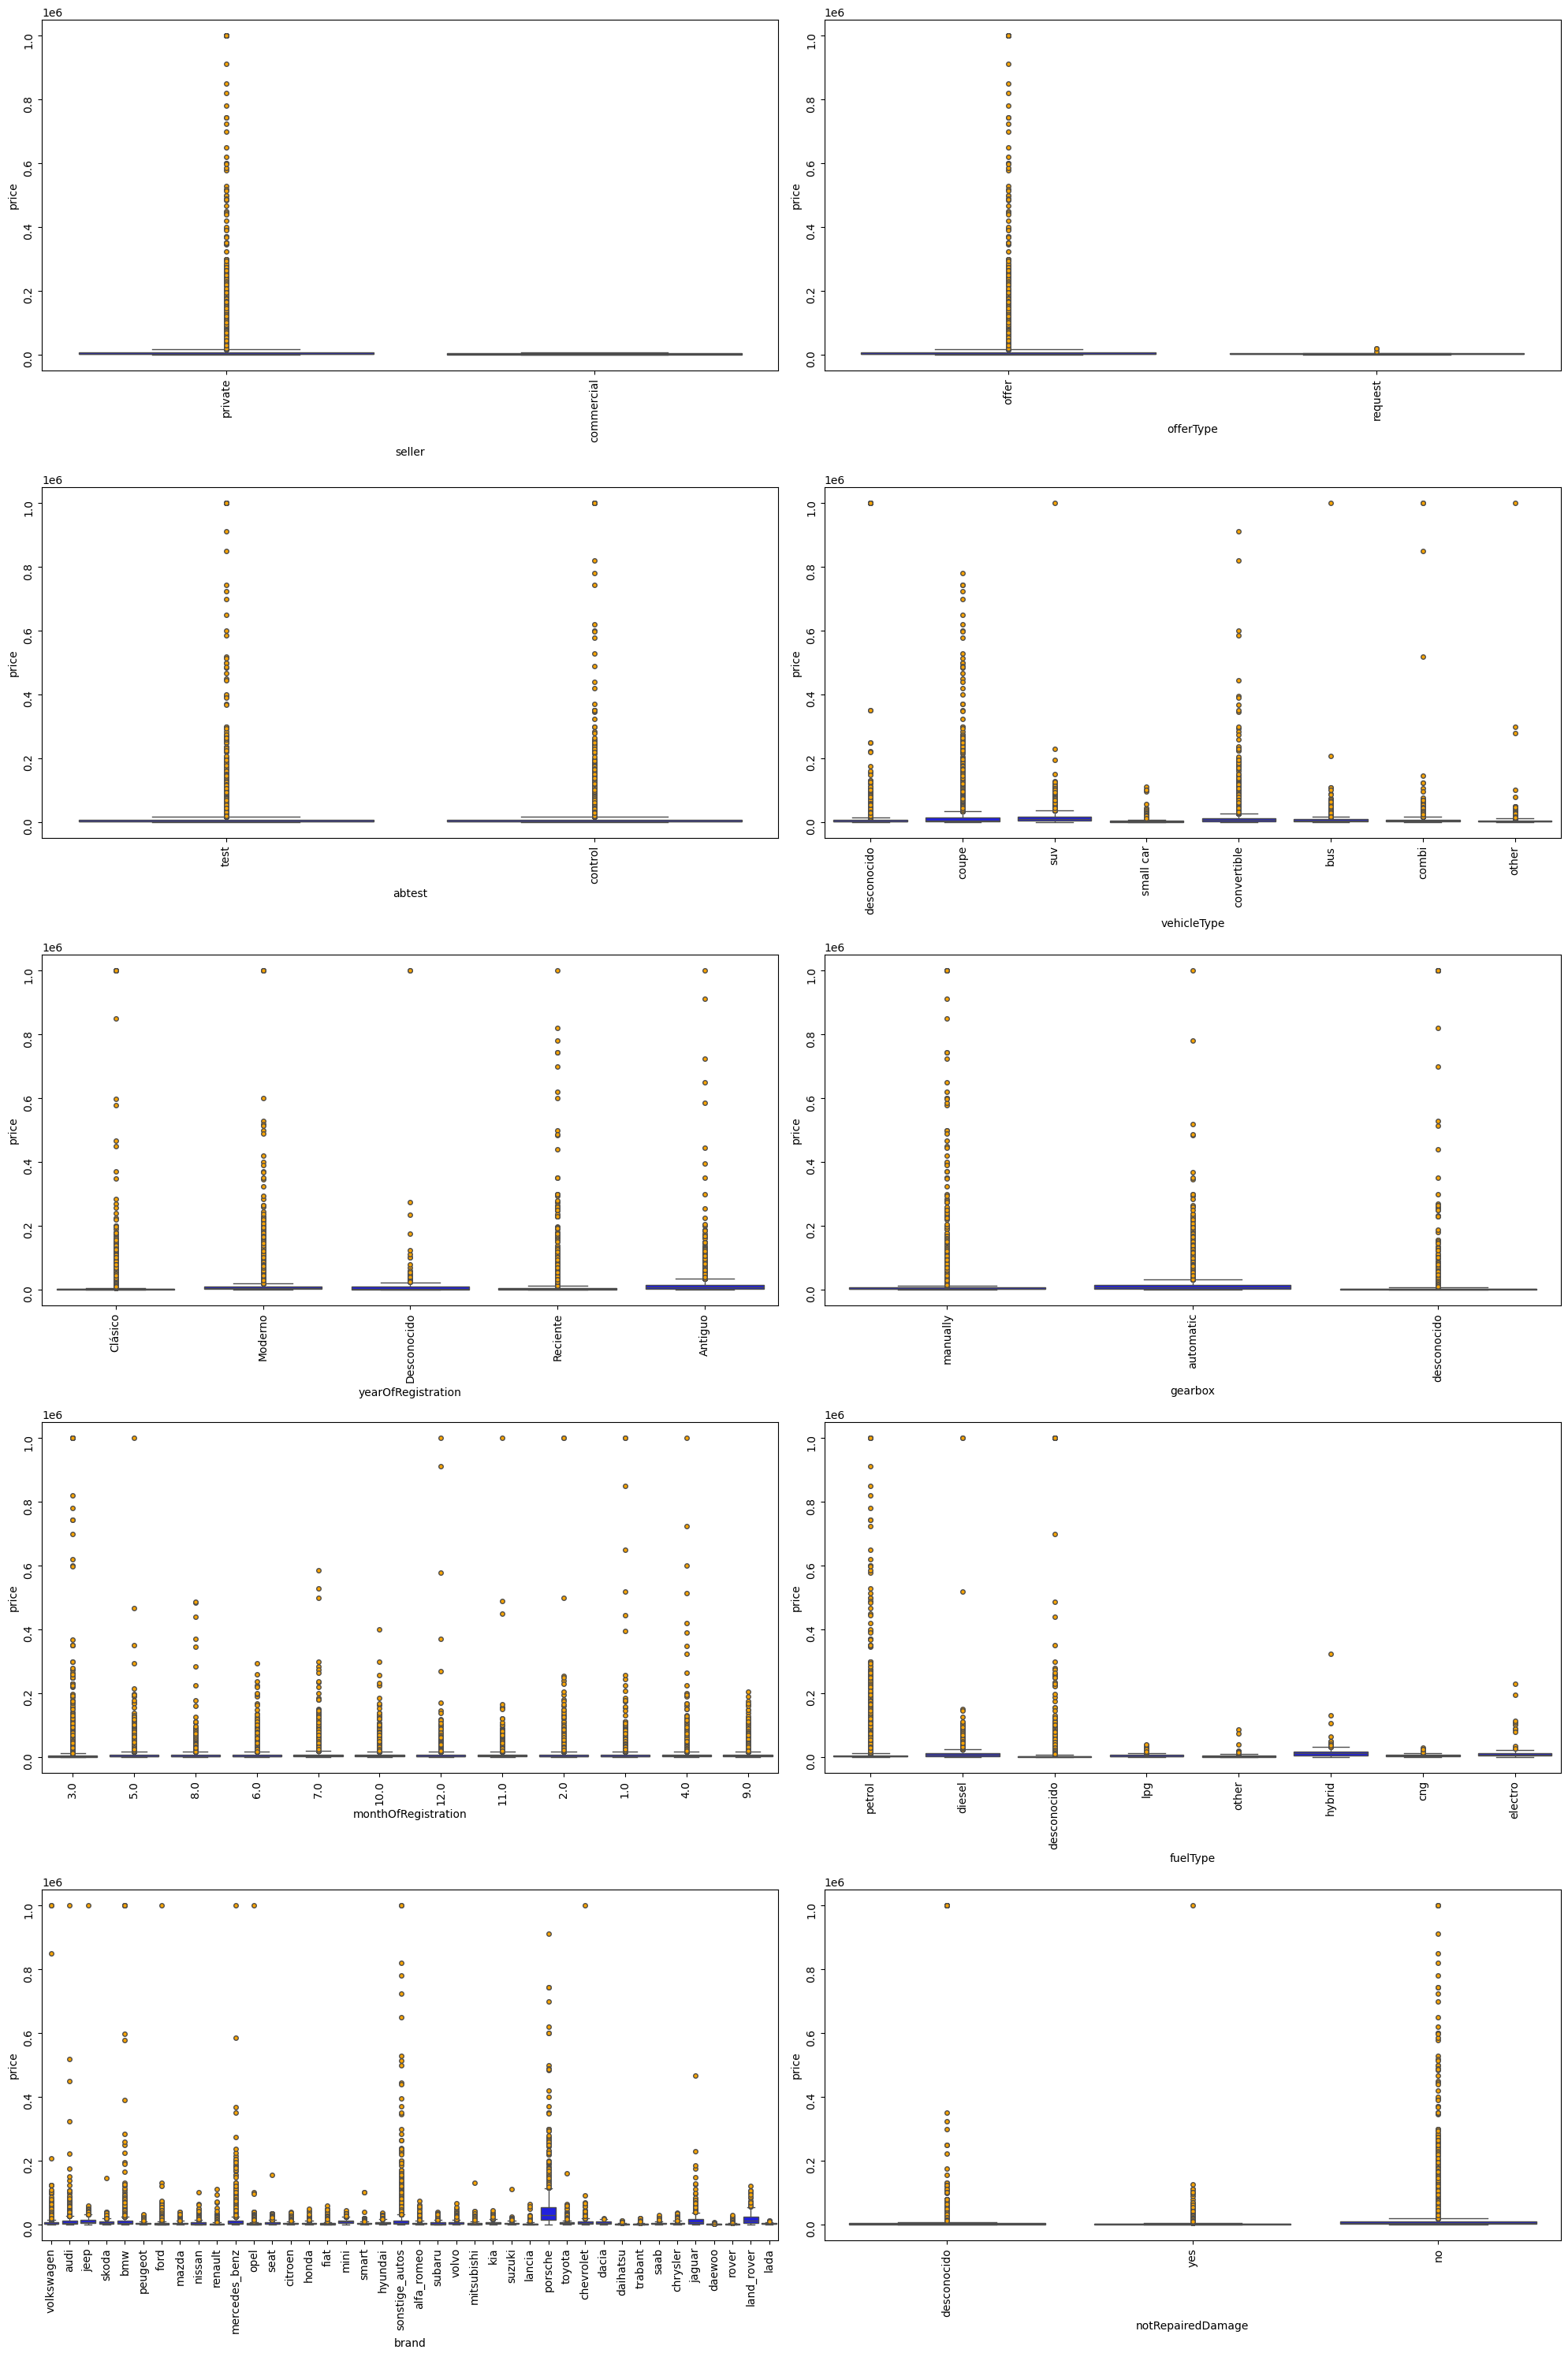

In [76]:
analisis_encoding.crear_boxplot(tamano_grafica=(20, 30))

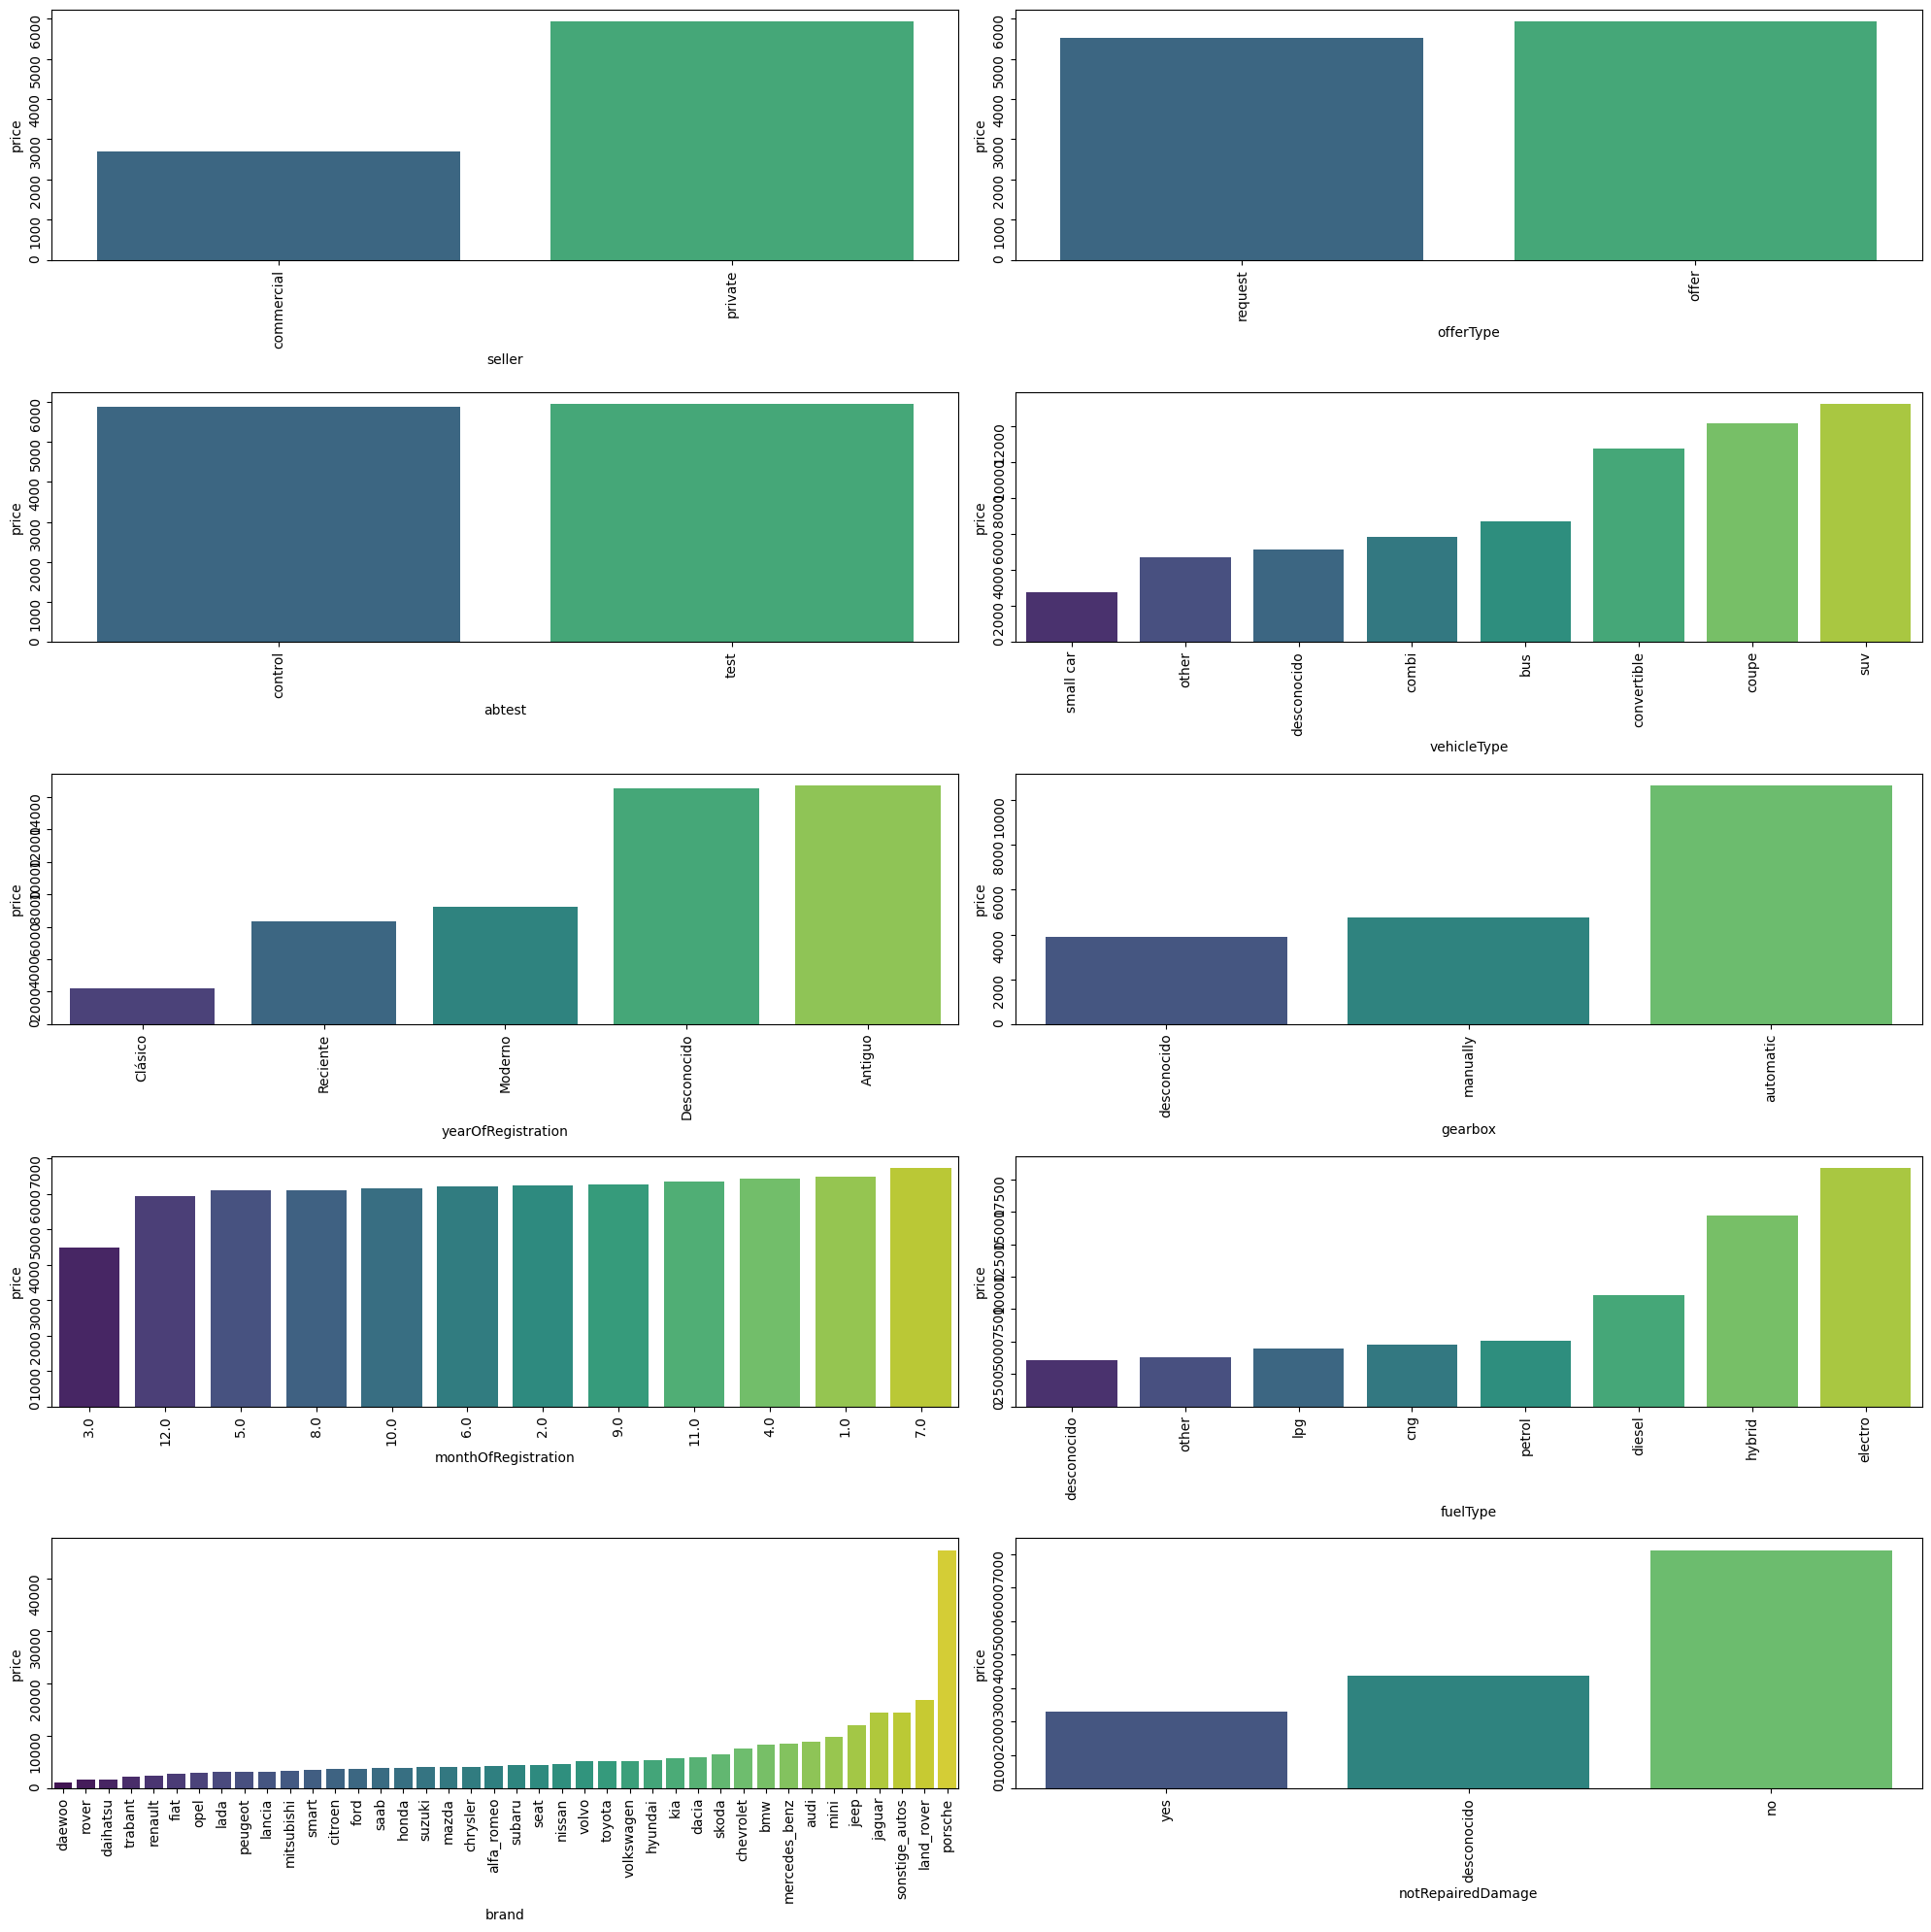

In [77]:
analisis_encoding.crear_barplot()

Vamos a aplicar un test A/B. Lo primero es decidir cual es el más adecuado

In [ ]:
# instanciamos la clase de Asunciones, para poder decidir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")


for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    # comprobamos la asunción de normalidad
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable SELLER
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable seller las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['private', 'commercial']

Realizando test de Kruskal...
Estadístico de prueba: 1.1591856063873325
Valor p: 0.28163450253527406
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable OFFERTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable offerType las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['offer', 'request']

Realizando test de Kruskal...
Estadístico de prueba: 0.06574115298241198
Valor p: 0.7976416972978062
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable ABTEST
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 17232397106.0
Valor p: 0.9626821556331989
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable VEHICLETYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable vehicleType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['desconocido', 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi', 'other']

Realizando test de Kruskal...
Estadístico de prueba: 49075.60783023141
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-873.0573,0.0,-1118.8783,-627.2364,bus-combi
1,4063.8664,0.0,3752.6738,4375.0589,bus-convertible
2,5473.2308,0.0,5144.4626,5801.9990,bus-coupe
3,-1546.2099,0.0,-1772.4612,-1319.9586,bus-desconocido
4,-1973.1007,0.0,-2619.2117,-1326.9896,bus-other
5,-3928.7489,0.0,-4168.5855,-3688.9123,bus-small car
6,6547.6069,0.0,6190.5112,6904.7026,bus-suv
7,4936.9237,0.0,4665.3598,5208.4877,combi-convertible
8,6346.2882,0.0,6054.7497,6637.8266,combi-coupe
9,-673.1526,0.0,-840.7706,-505.5345,combi-desconocido



###########################

Estamos analizando la variable YEAROFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable yearOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Clásico', 'Moderno', 'Desconocido', 'Reciente', 'Antiguo']

Realizando test de Kruskal...
Estadístico de prueba: 95420.36655602213
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-12476.0652,0.0,-13006.6724,-11945.4580,Antiguo-Clásico
2,-7430.0306,0.0,-7954.8440,-6905.2172,Antiguo-Moderno
3,-8326.6134,0.0,-8882.4873,-7770.7395,Antiguo-Reciente
4,12315.4863,0.0,10707.0760,13923.8966,Clásico-Desconocido
5,5046.0346,0.0,4924.5678,5167.5014,Clásico-Moderno
6,4149.4518,0.0,3929.6319,4369.2717,Clásico-Reciente
7,-7269.4517,0.0,-8875.9600,-5662.9435,Desconocido-Moderno
8,-8166.0345,0.0,-9782.9561,-6549.1129,Desconocido-Reciente
9,-896.5828,0.0,-1102.0237,-691.1419,Moderno-Reciente



###########################

Estamos analizando la variable GEARBOX
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['manually', 'automatic', 'desconocido']

Realizando test de Kruskal...
Estadístico de prueba: 37411.27681009505
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-6756.5991,0.0,-6975.2906,-6537.9075,automatic-desconocido
1,-5890.7055,0.0,-6003.5090,-5777.9020,automatic-manually
2,865.8936,0.0,664.1839,1067.6032,desconocido-manually



###########################

Estamos analizando la variable MONTHOFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable monthOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['3.0', '5.0', '8.0', '6.0', '7.0', '10.0', '12.0', '11.0', '2.0', '1.0', '4.0', '9.0']

Realizando test de Kruskal...
Estadístico de prueba: 10051.365841216728
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
2,-556.9524,0.0000,-908.8609,-205.0440,1.0-12.0
4,-2001.7166,0.0000,-2291.3156,-1712.1176,1.0-3.0
6,-392.6110,0.0077,-729.3585,-55.8635,1.0-5.0
9,-386.2209,0.0214,-743.9616,-28.4802,1.0-8.0
14,-1658.5741,0.0000,-1936.9204,-1380.2277,10.0-3.0
18,581.7093,0.0000,250.1623,913.2563,10.0-7.0
21,-411.5282,0.0064,-760.1659,-62.8906,11.0-12.0
23,-1856.2924,0.0000,-2141.9080,-1570.6768,11.0-3.0
27,383.9910,0.0109,46.3181,721.6639,11.0-7.0
31,-1444.7642,0.0000,-1730.8354,-1158.6930,12.0-3.0



###########################

Estamos analizando la variable FUELTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['petrol', 'diesel', 'desconocido', 'lpg', 'other', 'hybrid', 'cng', 'electro']

Realizando test de Kruskal...
Estadístico de prueba: 49078.10914394803
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
1,3809.5032,0.0000,2293.1682,5325.8382,cng-diesel
2,13653.3089,0.0000,9800.4540,17506.1637,cng-electro
3,9952.4114,0.0000,7309.5227,12595.3002,cng-hybrid
7,5015.4539,0.0000,4789.0961,5241.8117,desconocido-diesel
8,14859.2596,0.0000,11310.1109,18408.4083,desconocido-electro
9,11158.3621,0.0000,8981.9369,13334.7874,desconocido-hybrid
10,920.7856,0.0000,389.7945,1451.7766,desconocido-lpg
12,1512.8258,0.0000,1300.8093,1724.8423,desconocido-petrol
13,9843.8057,0.0000,6298.4623,13389.1491,diesel-electro
14,6142.9083,0.0000,3972.6939,8313.1226,diesel-hybrid



###########################

Estamos analizando la variable BRAND
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo', 'rover', 'land_rover', 'lada']

Realizando test de Kruskal...
Estadístico de prueba: 56254.74846150378
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,4643.0781,0.0000,3697.3619,5588.7943,alfa_romeo-audi
1,4134.1055,0.0000,3194.1930,5074.0180,alfa_romeo-bmw
2,3280.4240,0.0000,1903.5094,4657.3386,alfa_romeo-chevrolet
6,-3217.6153,0.0000,-5326.3498,-1108.8807,alfa_romeo-daewoo
7,-2516.7718,0.0000,-4323.3420,-710.2015,alfa_romeo-daihatsu
...,...,...,...,...,...
770,1284.8882,0.0054,163.2908,2406.4855,suzuki-toyota
772,1288.6468,0.0001,358.3219,2218.9717,suzuki-volkswagen
774,-3133.5642,0.0000,-5064.7622,-1202.3662,toyota-trabant
777,3137.3229,0.0000,1310.5636,4964.0822,trabant-volkswagen



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['desconocido', 'yes', 'no']

Realizando test de Kruskal...
Estadístico de prueba: 50345.38642031742
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3746.7675,0.0,3629.4601,3864.0748,desconocido-no
1,-1067.8882,0.0,-1247.4901,-888.2863,desconocido-yes
2,-4814.6556,0.0,-4970.8980,-4658.4133,no-yes



###########################



In [79]:
df.columns

Index(['postalCode', 'price', 'powerCV_robust', 'kilometer_robust',
       'outliers_lof_5_0.01', 'outliers_lof_5_0.05', 'outliers_lof_5_0.1',
       'outliers_lof_20_0.01', 'outliers_lof_20_0.05', 'outliers_lof_20_0.1',
       'outliers_lof_50_0.01', 'outliers_lof_50_0.05', 'outliers_lof_50_0.1',
       'seller', 'offerType', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

Vamos a definir un diccionario con los distintos tipos de encoding y las columnas que irán asociadas a cada uno de ellos. 


In [90]:
diccionario_encoding = {"onehot": [], # no metemos ninguna columna porque todas nuestras columnas tienen orden
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : [],
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": {
                                    'abtest': ['test', 'control'],
                                    'vehicleType': ['desconocido', 'coupe', 'suv', 'small car', 'convertible', 'bus', 'combi', 'other'],
                                    'yearOfRegistration': ['Clásico', 'Moderno', 'Desconocido', 'Reciente', 'Antiguo'],
                                    'gearbox': ['manually', 'automatic', 'desconocido'],
                                    'monthOfRegistration': ['3.0', '5.0', '8.0', '6.0', '7.0', '10.0', '12.0', '11.0', '2.0', '1.0', '4.0', '9.0'],
                                    'fuelType': ['petrol', 'diesel', 'desconocido', 'lpg', 'other', 'hybrid', 'cng', 'electro'],
                                    'brand': ['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'dacia', 'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo', 'rover', 'land_rover', 'lada'],
                                    'notRepairedDamage': ['desconocido', 'yes', 'no'],
                                    'seller': ['private', 'commercial'],
                                    'offerType': ['offer', 'request']
                                    }, # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": []
                        }

In [91]:
# Iniciamos la isntancia de encoding
encoding = se.Encoding(df, diccionario_encoding, 'price')

In [92]:
df=encoding.frequency_encoding()
df.head()

,postalCode,price,powerCV_robust,kilometer_robust,outliers_lof_5_0.01,outliers_lof_5_0.05,outliers_lof_5_0.1,outliers_lof_20_0.01,outliers_lof_20_0.05,outliers_lof_20_0.1,outliers_lof_50_0.01,outliers_lof_50_0.05,outliers_lof_50_0.1,seller,offerType,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage
0,70435,480.0,-0.374913,0.0,1,1,1,1,1,1,1,1,1,0.999992,0.999968,0.518359,0.360035,0.267843,0.738071,0.198760,0.602531,0.214358,0.193956
1,66954,18300.0,1.128683,-1.0,1,1,1,1,1,1,1,1,1,0.999992,0.999968,0.518359,0.051181,0.646996,0.738071,0.082446,0.290008,0.088481,0.097667
2,90480,9800.0,0.746735,-1.0,1,1,1,1,1,1,1,1,1,0.999992,0.999968,0.518359,0.039585,0.646996,0.207535,0.063966,0.290008,0.002172,0.193956
3,91074,1500.0,-0.531319,0.0,1,1,1,1,1,1,1,1,1,0.999992,0.999968,0.518359,0.215389,0.646996,0.738071,0.089272,0.602531,0.214358,0.708377
4,60437,3600.0,-0.619461,-2.4,1,1,1,1,1,1,1,1,1,0.999992,0.999968,0.518359,0.215389,0.646996,0.738071,0.077943,0.290008,0.015183,0.708377
